In [36]:
import pandas as pd
from sklearn.naive_bayes import MultinomialNB

from sklearn.model_selection import train_test_split

from nltk.corpus import stopwords


from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer


from sklearn.metrics import plot_confusion_matrix,roc_curve,f1_score,precision_score,recall_score,auc


import matplotlib.pyplot as plt

In [20]:
#load dataset
dataset_amazon = pd.read_csv('./OVH_emotions/sentiment labelled sentences/amazon_cells_labelled.txt',\
                     sep="\t",
                      names=['text', 'label'])

dataset_yelp = pd.read_csv('./OVH_emotions/sentiment labelled sentences/yelp_labelled.txt',\
                     sep="\t",
                      names=['text', 'label'])

dataset_imdb = pd.read_csv('./OVH_emotions/sentiment labelled sentences/imdb_labelled.txt',\
                     sep="\t",
                      names=['text', 'label'])


full_dataset = pd.concat([dataset_amazon,dataset_yelp,dataset_imdb])

In [21]:
full_dataset.shape

(2748, 2)

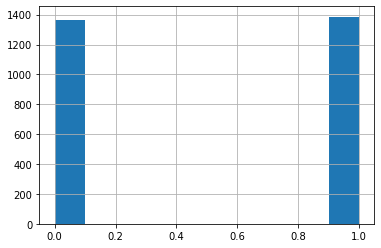

In [40]:
#Dataset EDA


#Check if dataset classes are imbalanced

full_dataset["label"].hist()

In [ ]:
#Dataset is well balanced

In [22]:
#Split train/val/test

X_trainval, X_test, y_trainval, y_test = train_test_split(full_dataset["text"], \
                                                    full_dataset['label'], \
                                                    test_size=0.2, random_state=42)


X_train, X_val, y_train, y_val = train_test_split(full_dataset["text"], \
                                                    full_dataset['label'], \
                                                    test_size=0.1, random_state=42)

In [26]:
#Vectorization
#Can choose between tfidf / bow / word2vec
#Lets test tfidf

tfidf = TfidfVectorizer(lowercase=True,
                        ngram_range=(1,1),
                        max_features=5000,
                        stop_words=stopwords.words("english")
                       )

In [31]:
#Fit / transform train dataset

tf_train = tfidf.fit_transform(X_train)

#transform test dataset
tf_test = tfidf.transform(X_test)

In [29]:
#Lets test a simple classifier
#Choice between SVM / Naive Bayes / Logistic

#Lets test naive bayes

#Weight more samples from minor class
clf = MultinomialNB(alpha=0.4, class_prior=None, fit_prior=False)
clf.fit(tf_train, y_train)

MultinomialNB(alpha=0.4, class_prior=None, fit_prior=False)

In [34]:
#Lets check model accuracy / f1-score / auc / confusion matrix

preds = clf.predict(tf_test)
f1_score(y_test,preds)

0.8946395563770795

Confusion matrix, without normalization
[[251  35]
 [ 22 242]]
Normalized confusion matrix
[[0.87762238 0.12237762]
 [0.08333333 0.91666667]]


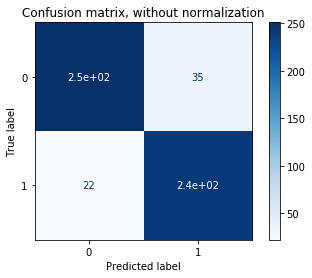

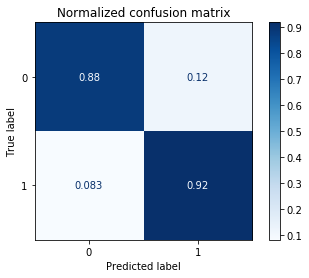

In [37]:
# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf, tf_test, y_test.to_numpy(),
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()